In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
data = pd.read_csv('dataset/Project Dataset/sales_data.csv')

In [3]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data = data.sort_values(by = 'Date')
data = data.reset_index().drop(columns=['index'])
data


,Date,Model,Quantity
0,2022-04-01,18 F AC,0.0
1,2022-04-01,3X7NEXX,0.0
2,2022-04-01,2T5GDEL,0.0
3,2022-04-01,2T5RRLX-GX,0.0
4,2022-04-01,2T5RRLX-XX,0.0
...,...,...,...
93598,2024-04-30,40 inch LED,0.0
93599,2024-04-30,32 inch LED,0.0
93600,2024-04-30,Multiplug,0.0
93601,2024-04-30,1D4GDEH,1.0


<b> Creating the clusters </b> to have a better understanding 
of the products based on their sales pattern.

In [4]:
# Creating a pivot table where each row represents a product, 
# and each column represents sales on a particular day.
sales_pivot = data.pivot_table(index = 'Model', columns = 'Date', values = 'Quantity', aggfunc = 'sum', fill_value = 0)
sales_pivot

Date,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,...,2024-04-21,2024-04-22,2024-04-23,2024-04-24,2024-04-25,2024-04-26,2024-04-27,2024-04-28,2024-04-29,2024-04-30
Model,,,,,,,,,,,,,,,,,,,,,
12 C AC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12 inch Fan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14 inch Fan,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,5.0,1.0,...,1.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,5.0,11.0
17 inch Fan,0.0,0.0,0.0,1.0,1.0,6.0,3.0,2.0,6.0,3.0,...,7.0,8.0,3.0,8.0,6.0,0.0,11.0,20.0,25.0,38.0
18 A AC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tornedo Fan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wall Move,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Washing Machine,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
# Normalizing the Data
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(sales_pivot)

In [6]:
scaled_df = pd.DataFrame(sales_scaled, columns = sales_pivot.columns, index = sales_pivot.index)

# Printing the scaled DataFrame
scaled_df

Date,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,...,2024-04-21,2024-04-22,2024-04-23,2024-04-24,2024-04-25,2024-04-26,2024-04-27,2024-04-28,2024-04-29,2024-04-30
Model,,,,,,,,,,,,,,,,,,,,,
12 C AC,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.196825,2.326068,-0.240717,-0.212479,-0.251795,0.0,-0.216588,0.416843,-0.141575,-0.141778
12 inch Fan,0.0,-0.351123,-0.248299,-0.294984,-0.234283,1.474860,-0.205847,4.081115,3.467839,2.523393,...,-0.196825,-0.205847,-0.240717,-0.212479,-0.251795,0.0,-0.216588,-0.134466,-0.141575,-0.141778
14 inch Fan,0.0,2.048220,2.805776,-0.294984,-0.234283,3.139150,2.326068,-0.172929,5.962250,2.523393,...,1.227260,1.060111,3.460310,2.276563,2.563728,0.0,1.886599,0.968152,2.035146,2.952186
17 inch Fan,0.0,-0.351123,-0.248299,1.972706,3.367818,9.796314,7.389898,8.335159,7.209456,8.065846,...,9.771765,9.921813,5.310823,9.743690,8.194773,0.0,7.495098,10.891715,10.742034,10.546461
18 A AC,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.196825,-0.205847,-0.240717,-0.212479,-0.251795,0.0,0.484474,-0.134466,-0.141575,-0.141778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tornedo Fan,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,-0.196825,-0.205847,-0.240717,-0.212479,-0.251795,0.0,-0.216588,-0.134466,-0.141575,-0.141778
Wall Move,0.0,-0.351123,-0.248299,-0.294984,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,-0.247833,...,1.227260,-0.205847,1.609796,-0.212479,-0.251795,0.0,-0.216588,-0.134466,-0.141575,-0.141778
Washing Machine,0.0,-0.351123,-0.248299,1.972706,-0.234283,-0.189431,-0.205847,-0.172929,-0.273777,2.523393,...,-0.196825,2.326068,-0.240717,-0.212479,-0.251795,0.0,0.484474,-0.134466,-0.141575,-0.141778


In [7]:
# Choosing the number of clusters
num_clusters = 15

# Applying K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(sales_scaled)

# Adding the cluster labels to your original pivot table
sales_pivot['Cluster'] = clusters


Products in this cluster
2E4GDEH


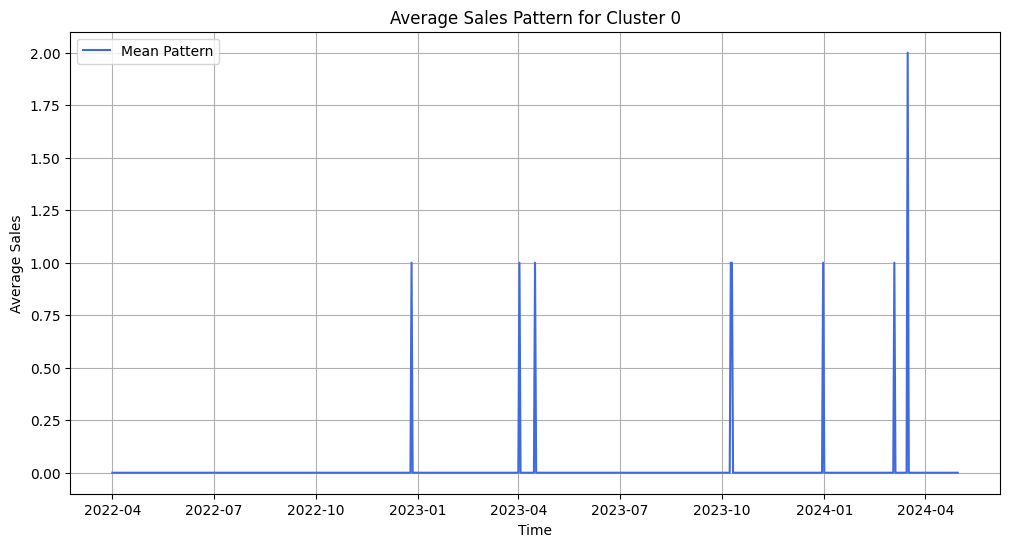


Products in this cluster
17 inch Fan


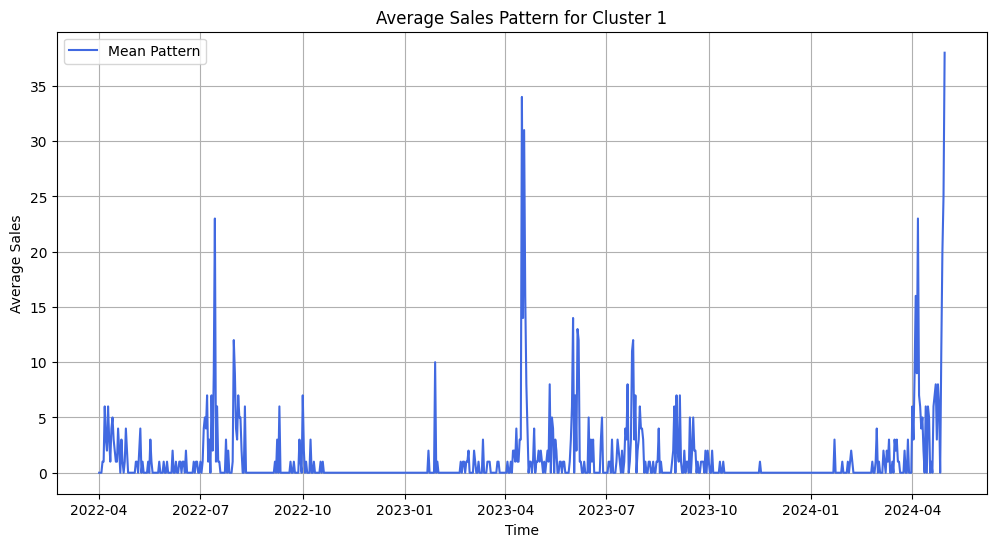


Products in this cluster
1F3GDEL


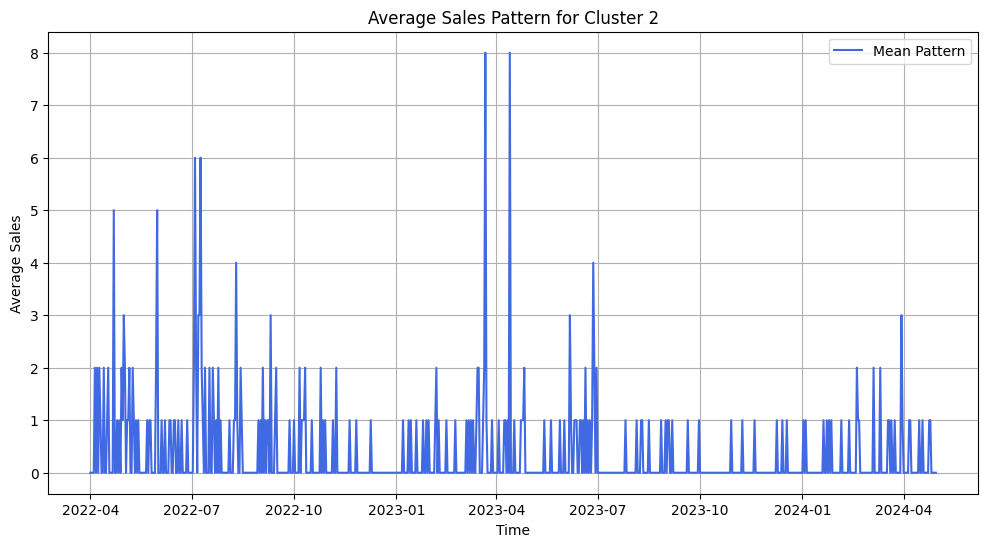


Products in this cluster
14 inch Fan


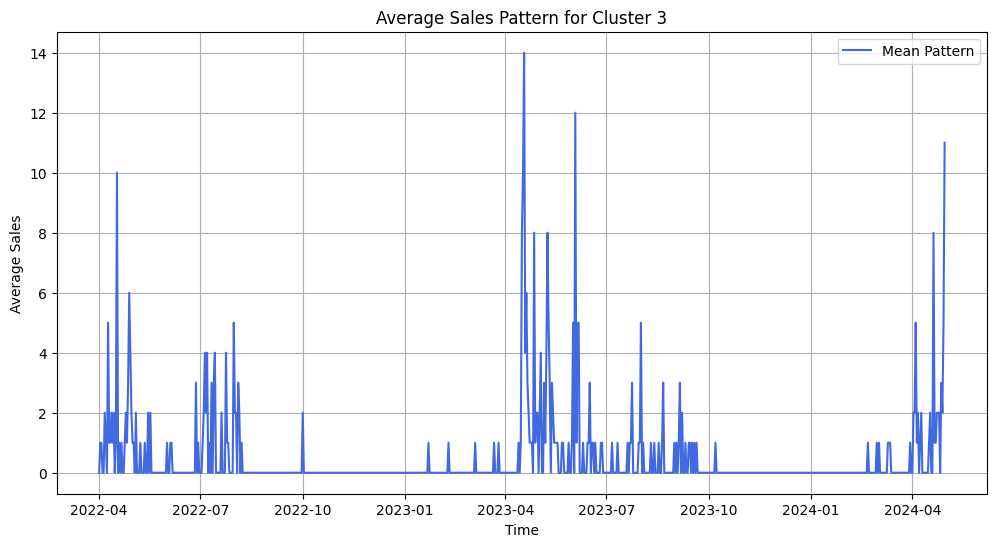


Products in this cluster
2A3GDXX


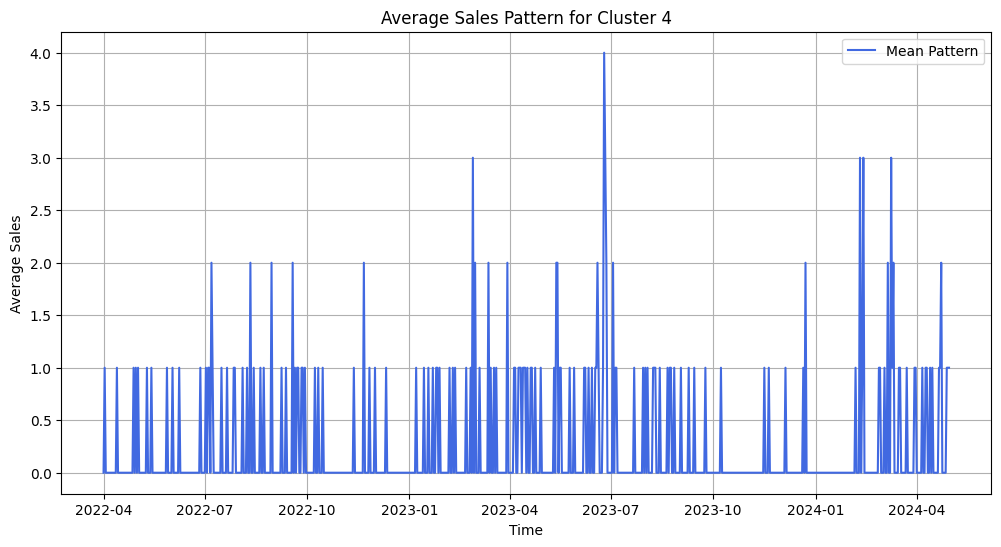


Products in this cluster
12 C AC
12 inch Fan
18 A AC
18 C AC
18 F AC
1B3GDEL
1B6GDEH
1B6GDEL
1B6RXXX
1D4CRXX
1D4GDEH
1D4GDEL
1D4GDSH
1D5GDEL
1D5RXXX
1F3GDEH
1F3GDSH
1F3RXXX
1H5ELXX
1H5GDEL
1H5GDSH
1X1RXXX
24 B AC
24 C AC
2A3ELXX
2A3GDEH
2A3GDEL
2A3GDSH
2A3RLXX
2A7GDEL
2A8GDXX
2B0GDXX
2B3GDEL
2B3GDSH
2B3GDXX
2B6GDEL
2B6RXXX
2D4GDEL
2D4RXXX
2E0GDEL
2E0GDXX
2E4GDXX
2E5EHLX
2E5GDEL
2F0GDEL
2F0GDXX
2G0CGXX
2H2GDEL
2H2GDXX (Inv)
2N5CRXX
2N5GDEL
2N5GDEL (Inv)
2N5GDXX
2T5GDEL
2T5RRLX-GX
2T5RRLX-XX
3A2GDEL
3A2GDEN
3A2GDXX
3A7GDXX
3A7NXXX
3B0GDEL
3B0GDXX
3B0GDXX (inv)
3D8GD-DD
3D8GDEH-DD
3D8GDEL
3D8GDEL (inv)
3D8GDSH
3D8GDXX
3E8GDXX
3F5GDSH
3F5GDXX
3J0GDEL
3J0GDEL DD
3J0RXXX
3X7GDEL
3X7NEXX
3X9GDEL
3X9GDXX
40 inch LED
5F3GDEL
5F3GDEL-DD
Air Cooler
Blender
Ceiling Fan
Fry Pan
Glyser
Induction Cooker
Infered Cooker
Light Bulb
Mobile H10
Mobile N5
Mobile P16
Multi Cooker
Multiplug
Oven
Pressure Cooker
Protector
Remote
Room Heater
Ruti Tawa
Speaker
Stabilizer
Tornedo Fan
Wall Move
Washing Machine
W

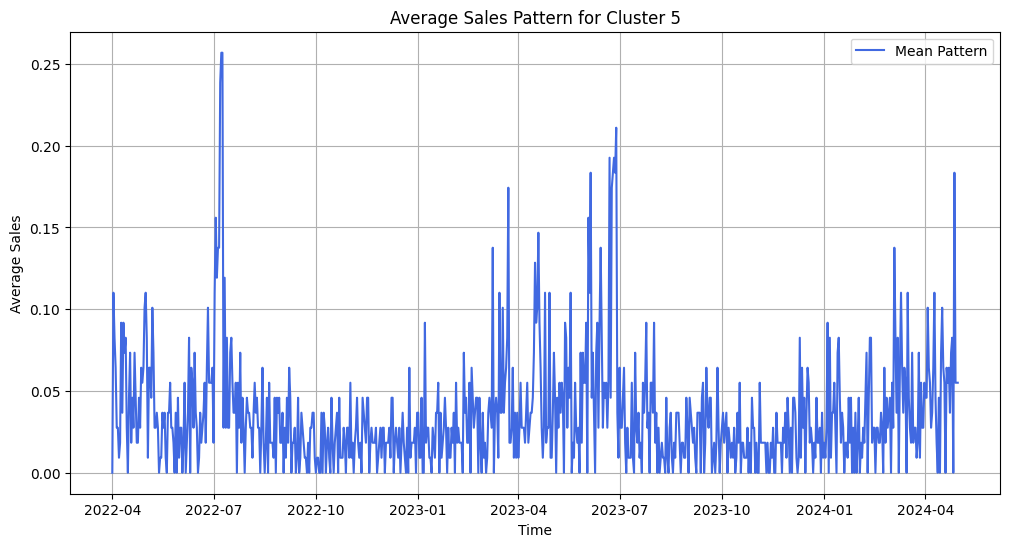


Products in this cluster
32 inch LED


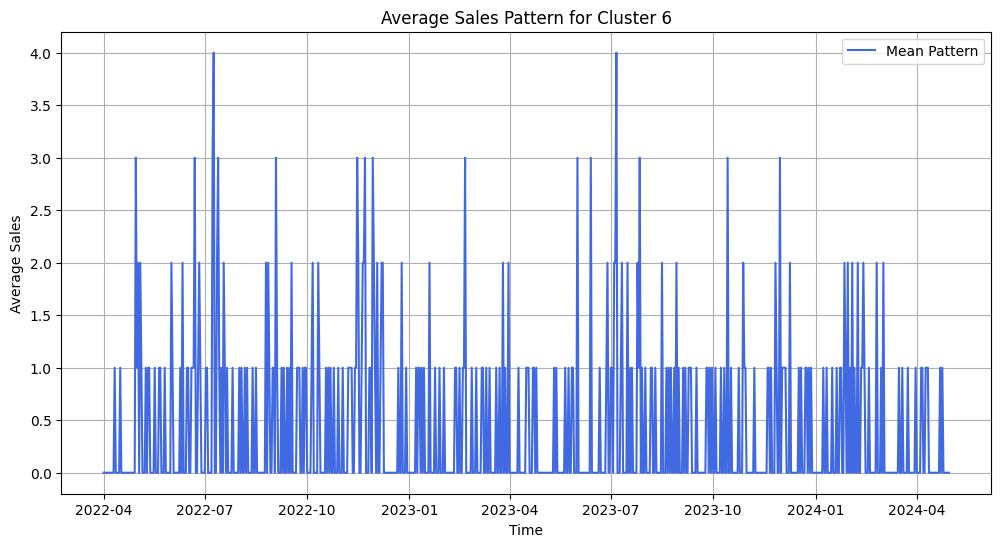


Products in this cluster
Grinder


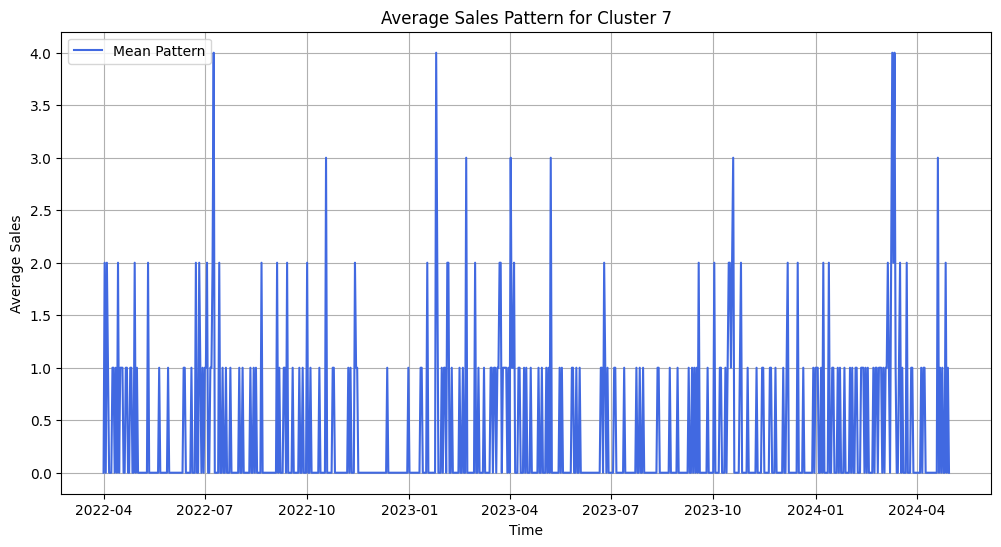


Products in this cluster
24 inch LED


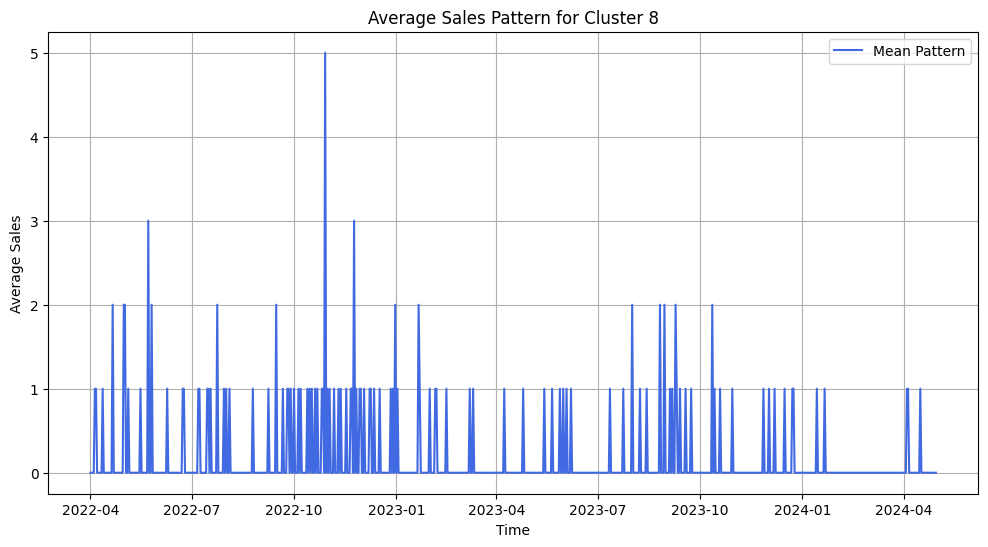


Products in this cluster
Stand Fan


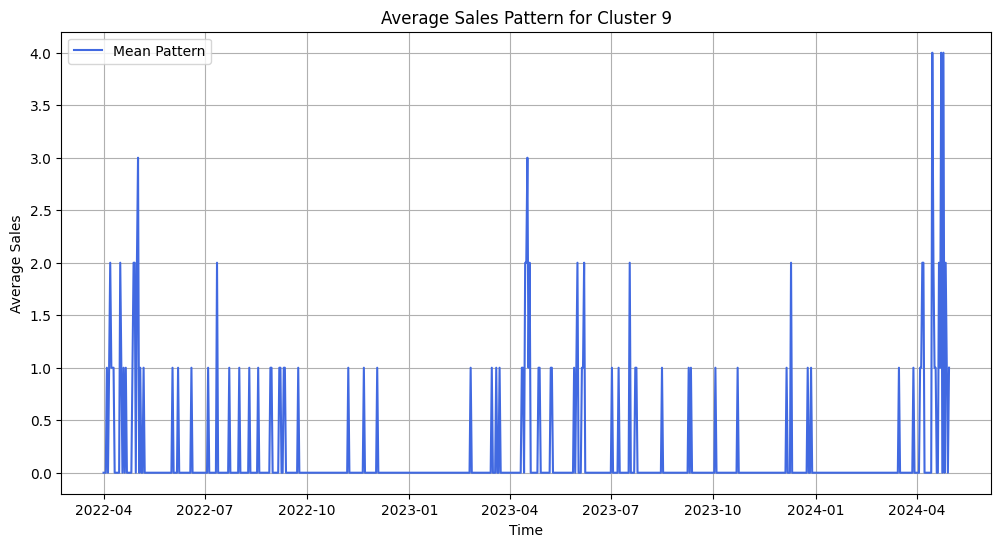


Products in this cluster
Kettle


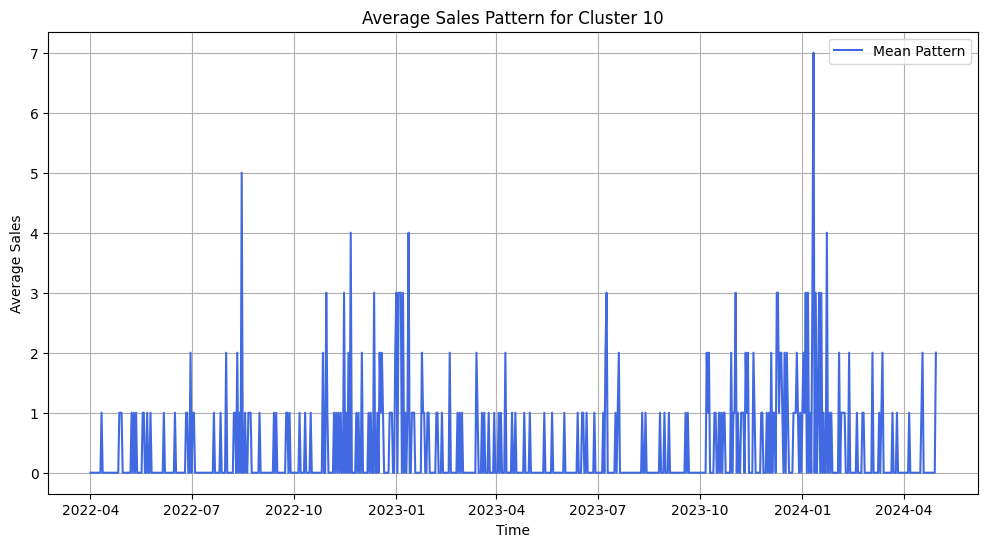


Products in this cluster
Rice Cooker


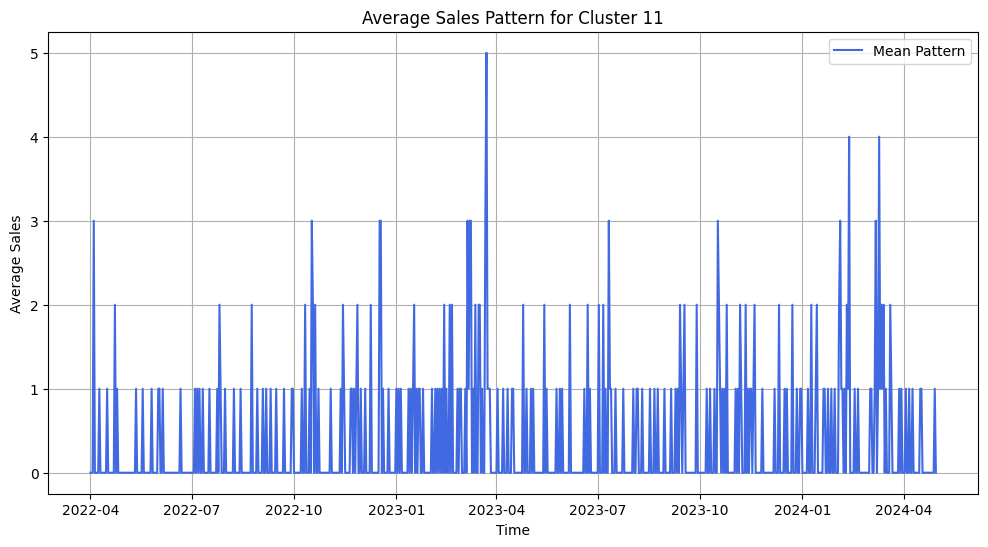


Products in this cluster
Gas Stove


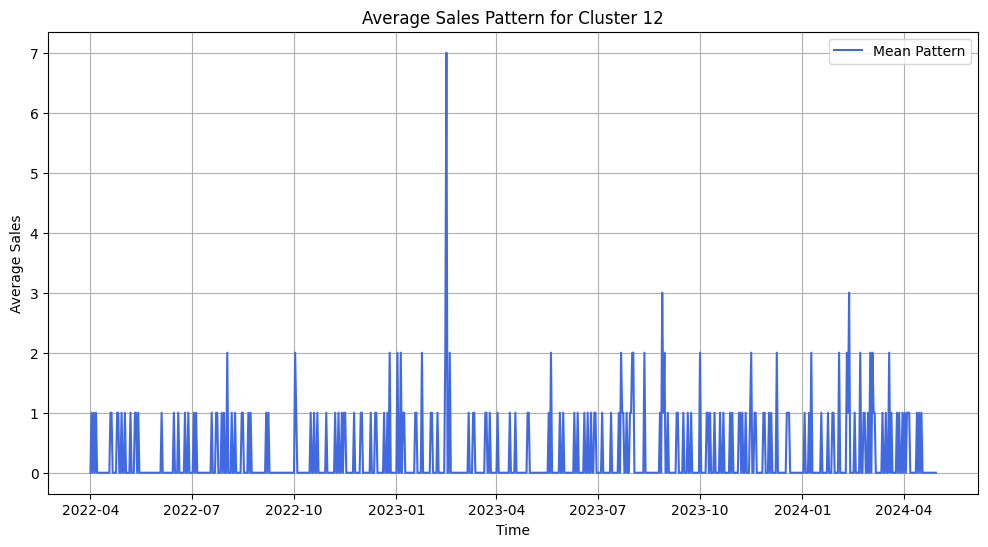


Products in this cluster
Iron


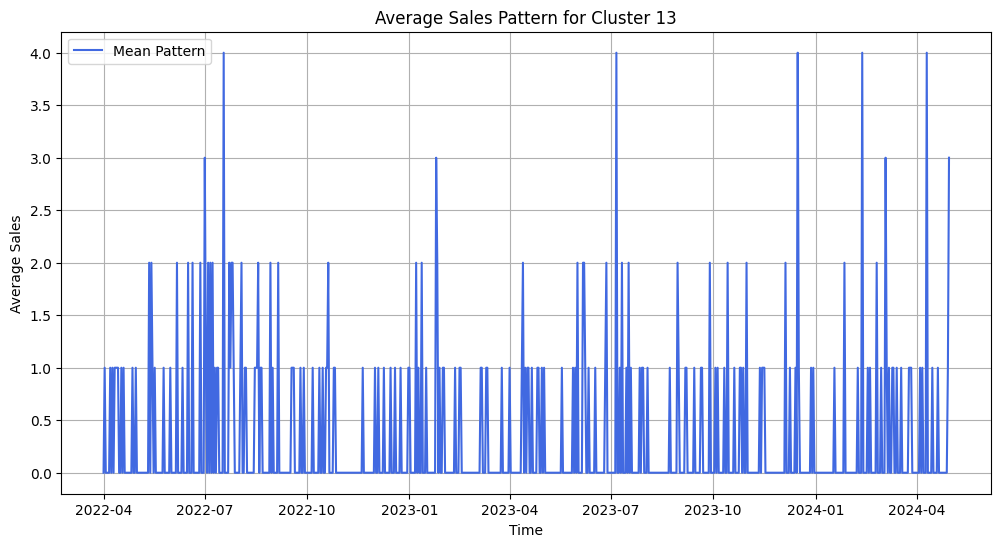


Products in this cluster
43 inch 4K


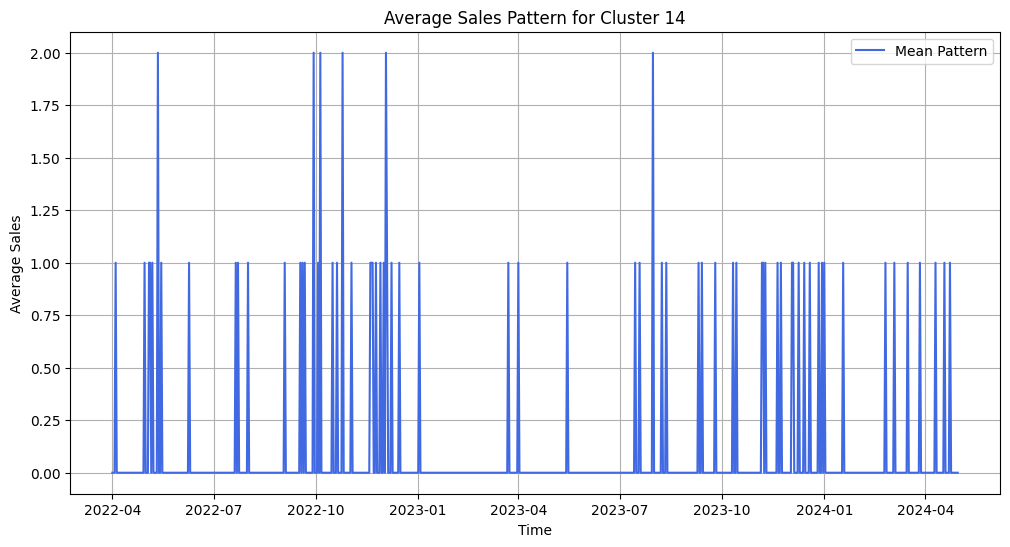

In [8]:
for cluster in range(num_clusters):
    print("\nProducts in this cluster")
    for product in sales_pivot[sales_pivot['Cluster'] == cluster].index:
        print(product)

    plt.figure(figsize = (12, 6))
    plt.title(f'Average Sales Pattern for Cluster {cluster}')
    
    mean_pattern = sales_pivot[sales_pivot['Cluster'] == cluster].iloc[:, :-1].mean()

    # Ploting the mean pattern
    plt.plot(sales_pivot.columns[:-1], mean_pattern, label = 'Mean Pattern', color = 'royalblue')
    
    plt.xlabel('Time')
    plt.ylabel('Average Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


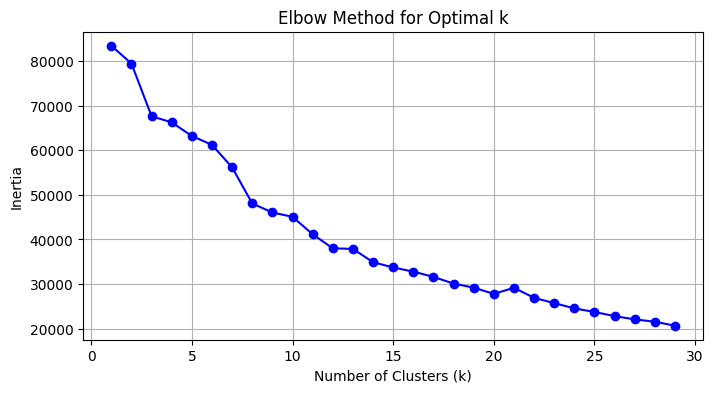

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(sales_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
